In [ ]:
 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

In [ ]:
# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns
whale_data = Path('Resources/whale_returns.csv')
whale_df  = pd.read_csv(whale_data,
                      index_col = "Date",
                      infer_datetime_format = True,
                      parse_dates= True
                      )    
dir(whale_df)

['T',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__re

In [4]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_clean = whale_df.dropna().copy()
whale_clean.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [7]:
# Reading algorithmic returns
algo_data = Path('Resources/algo_returns.csv')
algo_df  = pd.read_csv(algo_data,
                      index_col = "Date",
                      infer_datetime_format = True,
                      parse_dates= True
                      )

In [8]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls
algo_clean = algo_df.dropna().copy()
algo_clean.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P 500 Closing Prices
sp500_data = Path('Resources/sp500_history.csv')
sp500_df = pd.read_csv(sp500_data,
                      index_col = "Date",
                      infer_datetime_format = True,
                      parse_dates= True
                      )

sp500_daily_returns = sp500_df
sp500_daily_returns.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [11]:
# Check Data Types
sp500_daily_returns.dtypes

Close    object
dtype: object

In [12]:
# Fix Data Types
sp500_daily_returns['Close'] = sp500_daily_returns['Close'].str.replace('$', ' ')
sp500_daily_returns['Close'] = sp500_daily_returns['Close'].astype('float')
                                                        
sp500_daily_returns.head()


,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [13]:
# Calculate Daily Returns
sp500_daily_returns.pct_change()
sp500_daily_returns.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


# Drop nulls


In [14]:
sp500_daily_returns.dropna()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06
...,...
2012-10-05,1460.93
2012-10-04,1461.40
2012-10-03,1450.99


In [15]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns = sp500_daily_returns.rename(columns = {'Close': 'S&P 500'})
sp500_daily_returns.head()

,S&P 500
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


## Combine Whale, Algorithmic, and S&P 500 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
portfolio_df = pd.concat([whale_clean, algo_clean, sp500_daily_returns], axis = 'columns', join = 'inner')
portfolio_df.sort_index()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,2107.78
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,2098.53
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,2101.04
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,2071.26
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,2079.43
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,2907.06
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,2900.45
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,2905.03


In [17]:
portfolio_df.columns = ['SOROS', 'PAULSON', 'Tiger', 'Buffett', 'Algo 1', 'Algo 2', 'SP500_Close']
portfolio_df.head()

,SOROS,PAULSON,Tiger,Buffett,Algo 1,Algo 2,SP500_Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,2107.78
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,2098.53
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,2101.04
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,2071.26
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,2079.43


In [18]:
portfolio_df.pct_change()
portfolio_df.head()

,SOROS,PAULSON,Tiger,Buffett,Algo 1,Algo 2,SP500_Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,2107.78
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,2098.53
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,2101.04
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,2071.26
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,2079.43


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

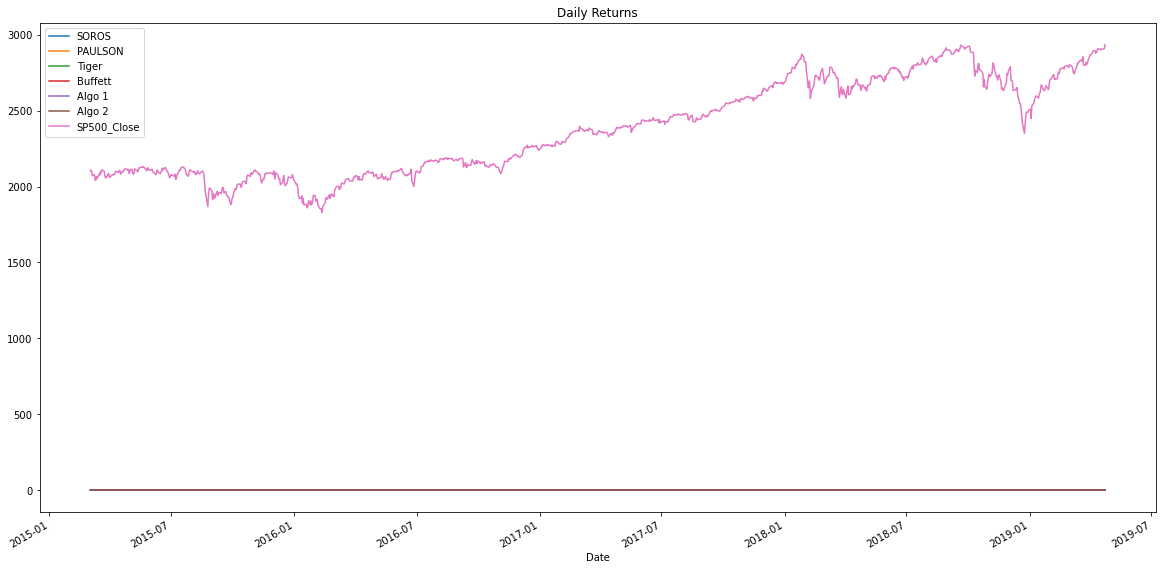

In [19]:
# Plot daily returns of all portfolios
portfolio_df.plot(figsize = (20, 10), title = 'Daily Returns')

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative'}, xlabel='Date'>

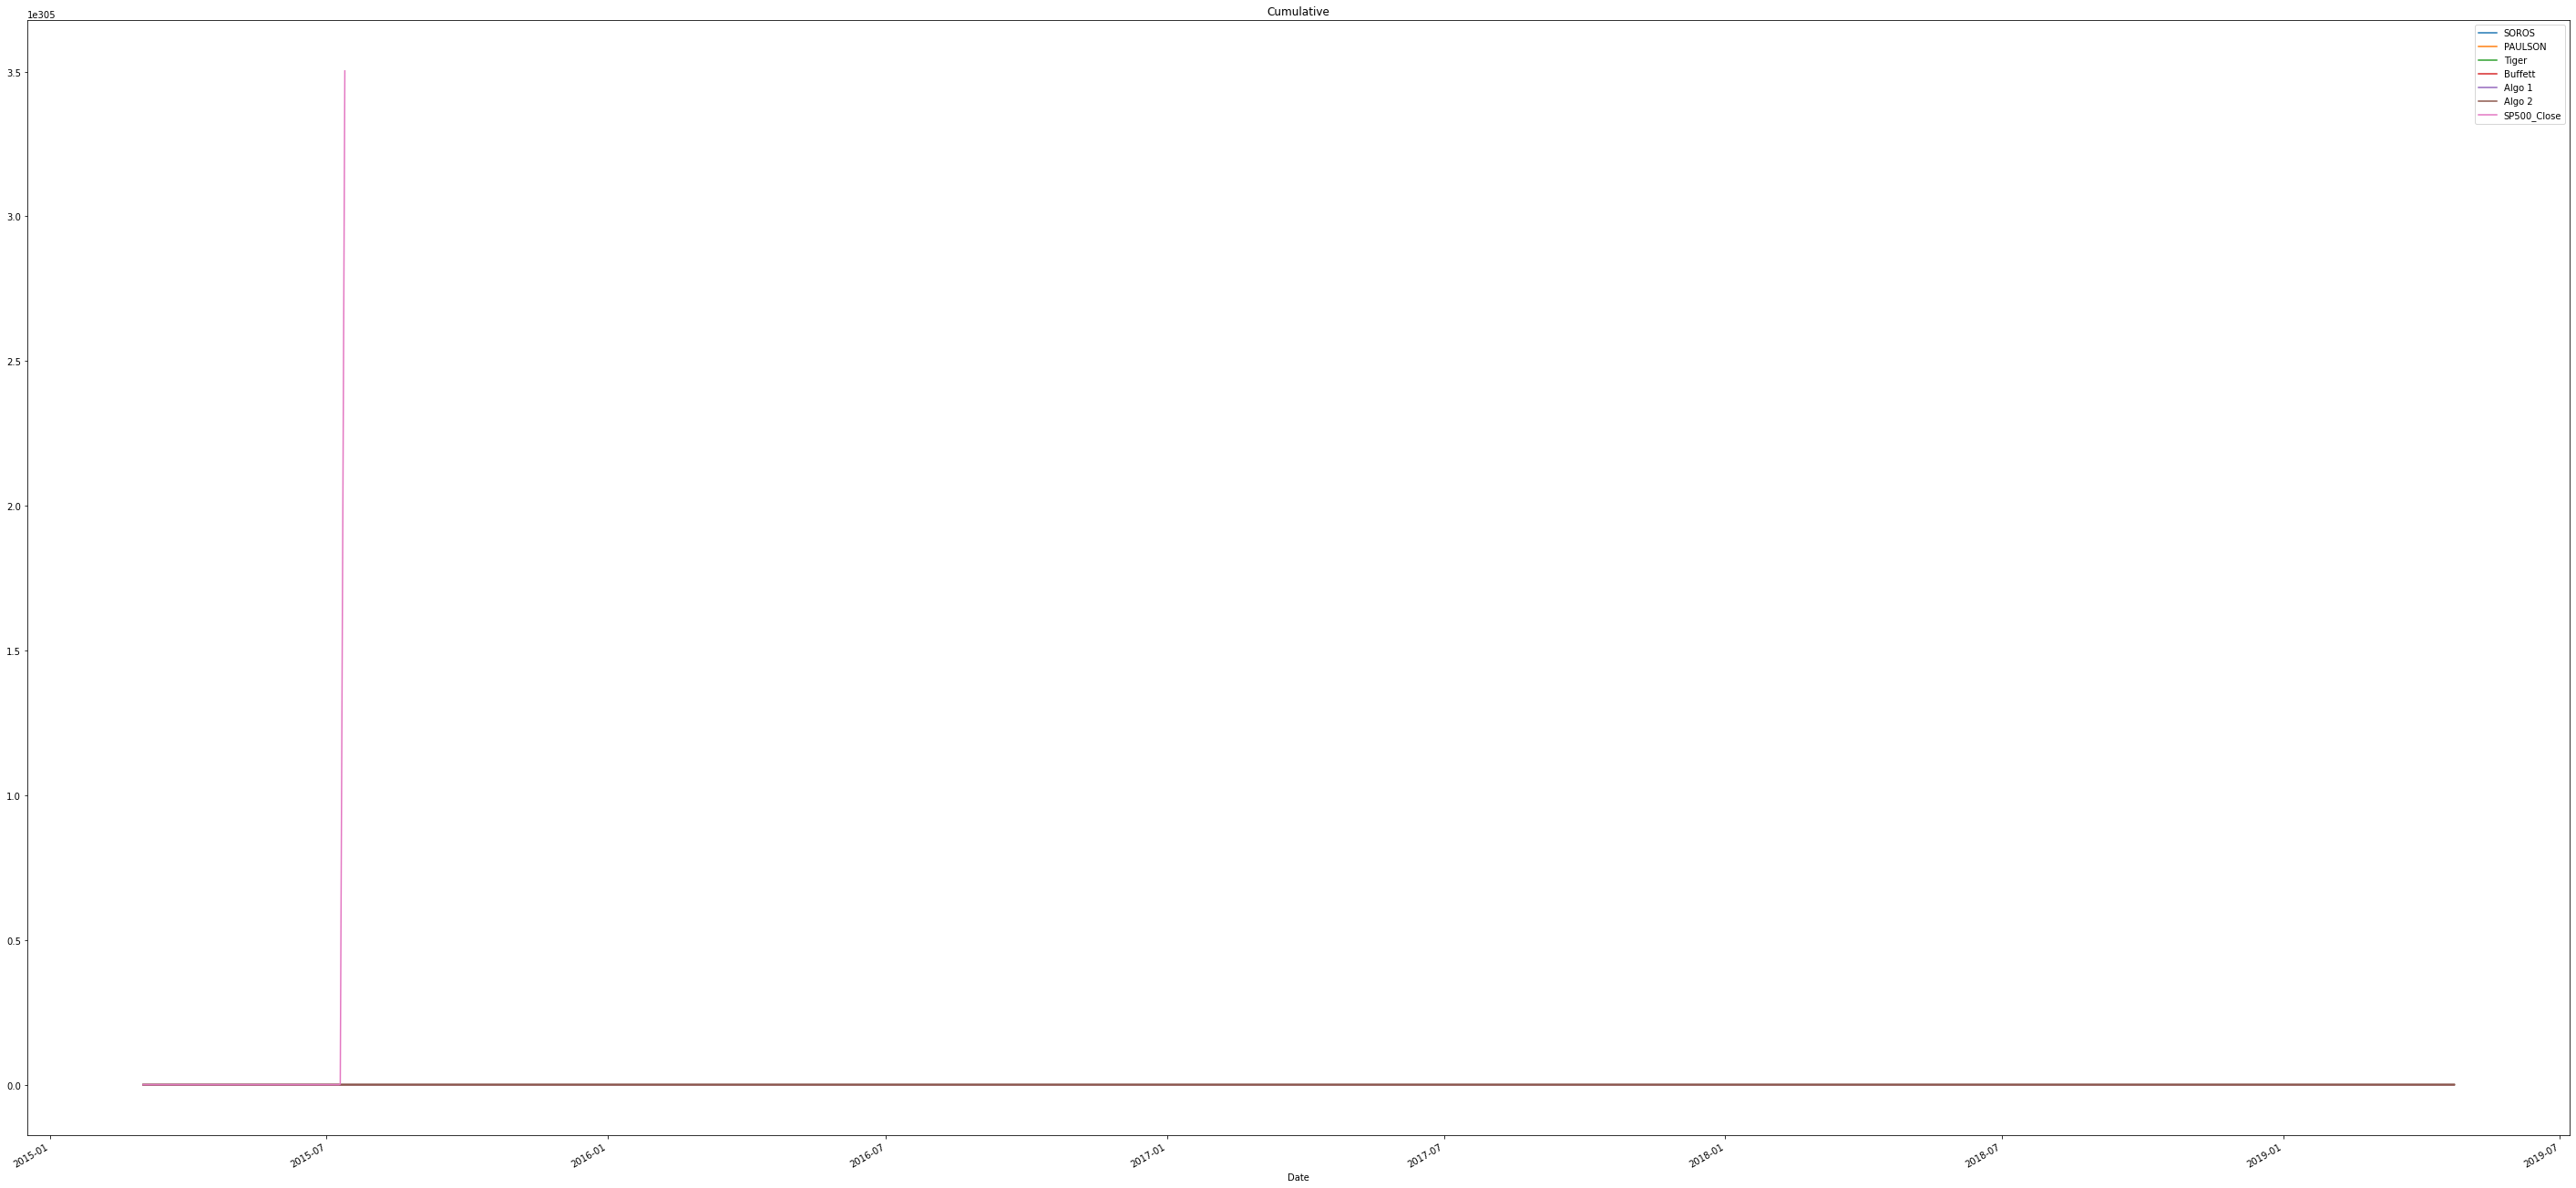

In [20]:
# Calculate cumulative returns of all portfolios
cum_returns = (1 + portfolio_df).cumprod()

# Plot cumulative returns
cum_returns.plot(figsize = (50, 25), title = 'Cumulative')

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Portfolio Risk Returns'}>

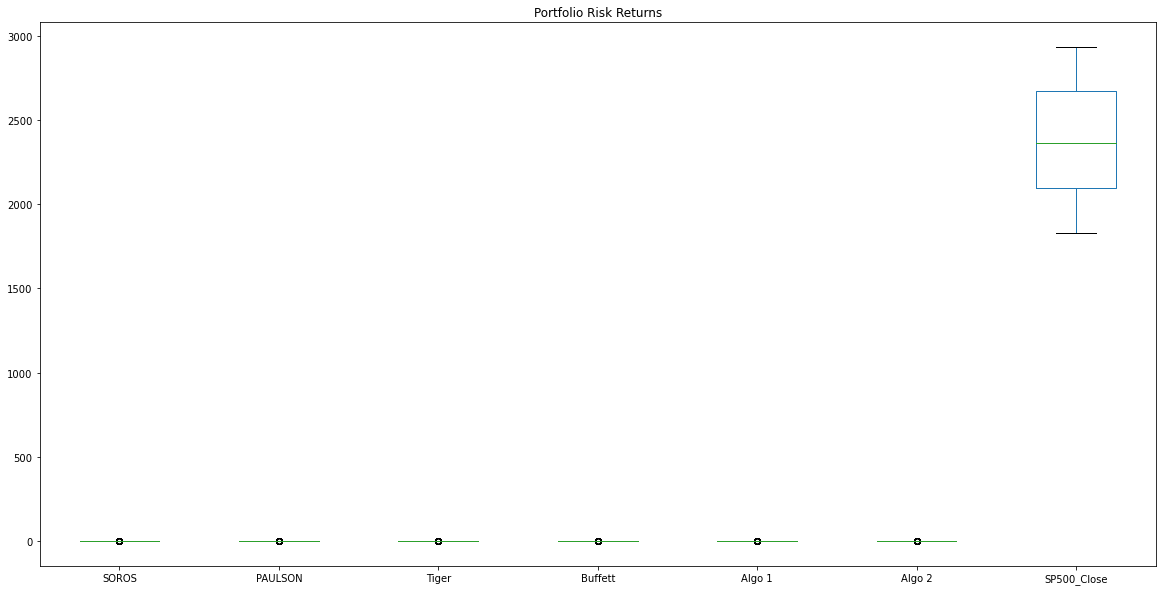

In [21]:
# Box plot to visually show risk
portfolio_df.plot(kind = 'box', figsize = (20, 10), title = 'Portfolio Risk Returns')

C:\Users\Stephan\anaconda3\envs\alapacaenv\lib\site-packages\numpy\lib\function_base.py:3949: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
C:\Users\Stephan\anaconda3\envs\alapacaenv\lib\site-packages\matplotlib\cbook\__init__.py:1183: RuntimeWarning: invalid value encountered in double_scalars
  stats['iqr'] = q3 - q1
C:\Users\Stephan\anaconda3\envs\alapacaenv\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\Stephan\anaconda3\envs\alapacaenv\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]


<AxesSubplot:title={'center':'Cumulative Risk Returns'}>

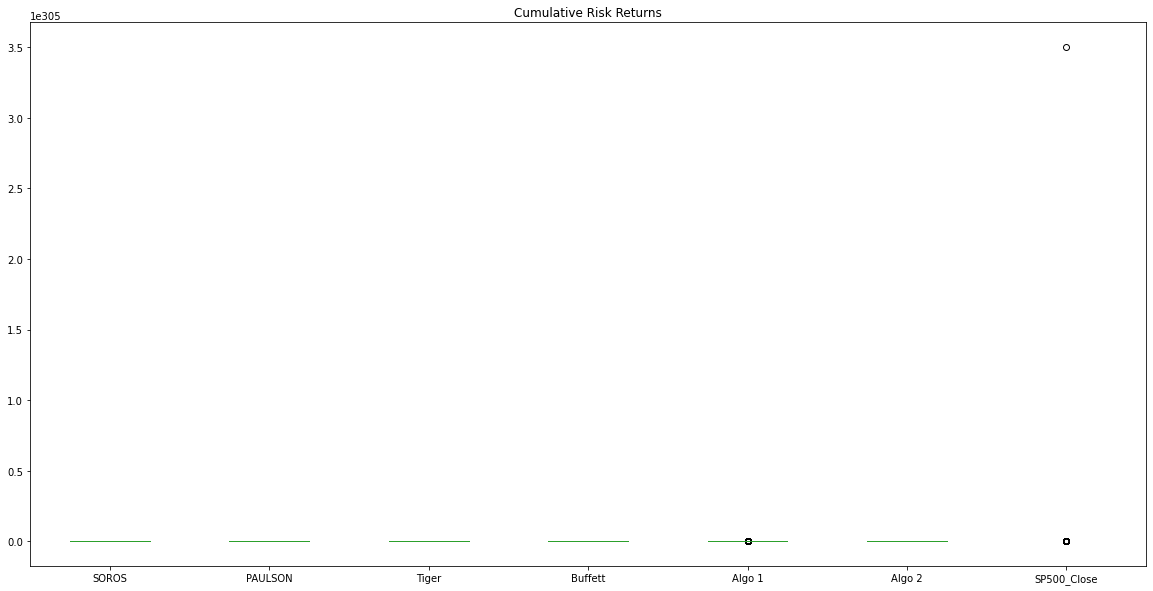

In [22]:
cum_returns.plot(kind = 'box', figsize = (20, 10), title = 'Cumulative Risk Returns')

### Calculate Standard Deviations

In [23]:
# Calculate the daily standard deviations of all portfolios
portfolio_std = portfolio_df.std()
portfolio_std.head()

SOROS      0.007895
PAULSON    0.007023
Tiger      0.010894
Buffett    0.012919
Algo 1     0.007620
dtype: float64

In [24]:
cum_daily_std = cum_returns.std()
cum_daily_std.head()

SOROS      0.073238
PAULSON    0.088455
Tiger      0.149844
Buffett    0.241575
Algo 1     0.232277
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [27]:
# Calculate  the daily standard deviation of S&P 500
sp500_daily_dev = portfolio_df['S&P 500'].std()

# Determine which portfolios are riskier than the S&P 500
portfolio_df.std() > sp500_daily_dev

KeyError: 'S&P 500'

### Calculate the Annualized Standard Deviation

In [28]:
# Calculate the annualized standard deviation (252 trading days)
sp500_annual_dev = portfolio_df.std() * np.sqrt(252)
sp500_annual_dev


SOROS             0.125335
PAULSON           0.111488
Tiger             0.172936
Buffett           0.205077
Algo 1            0.120967
Algo 2            0.132430
SP500_Close    4855.251803
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Portfolio Rolling'}, xlabel='Date'>

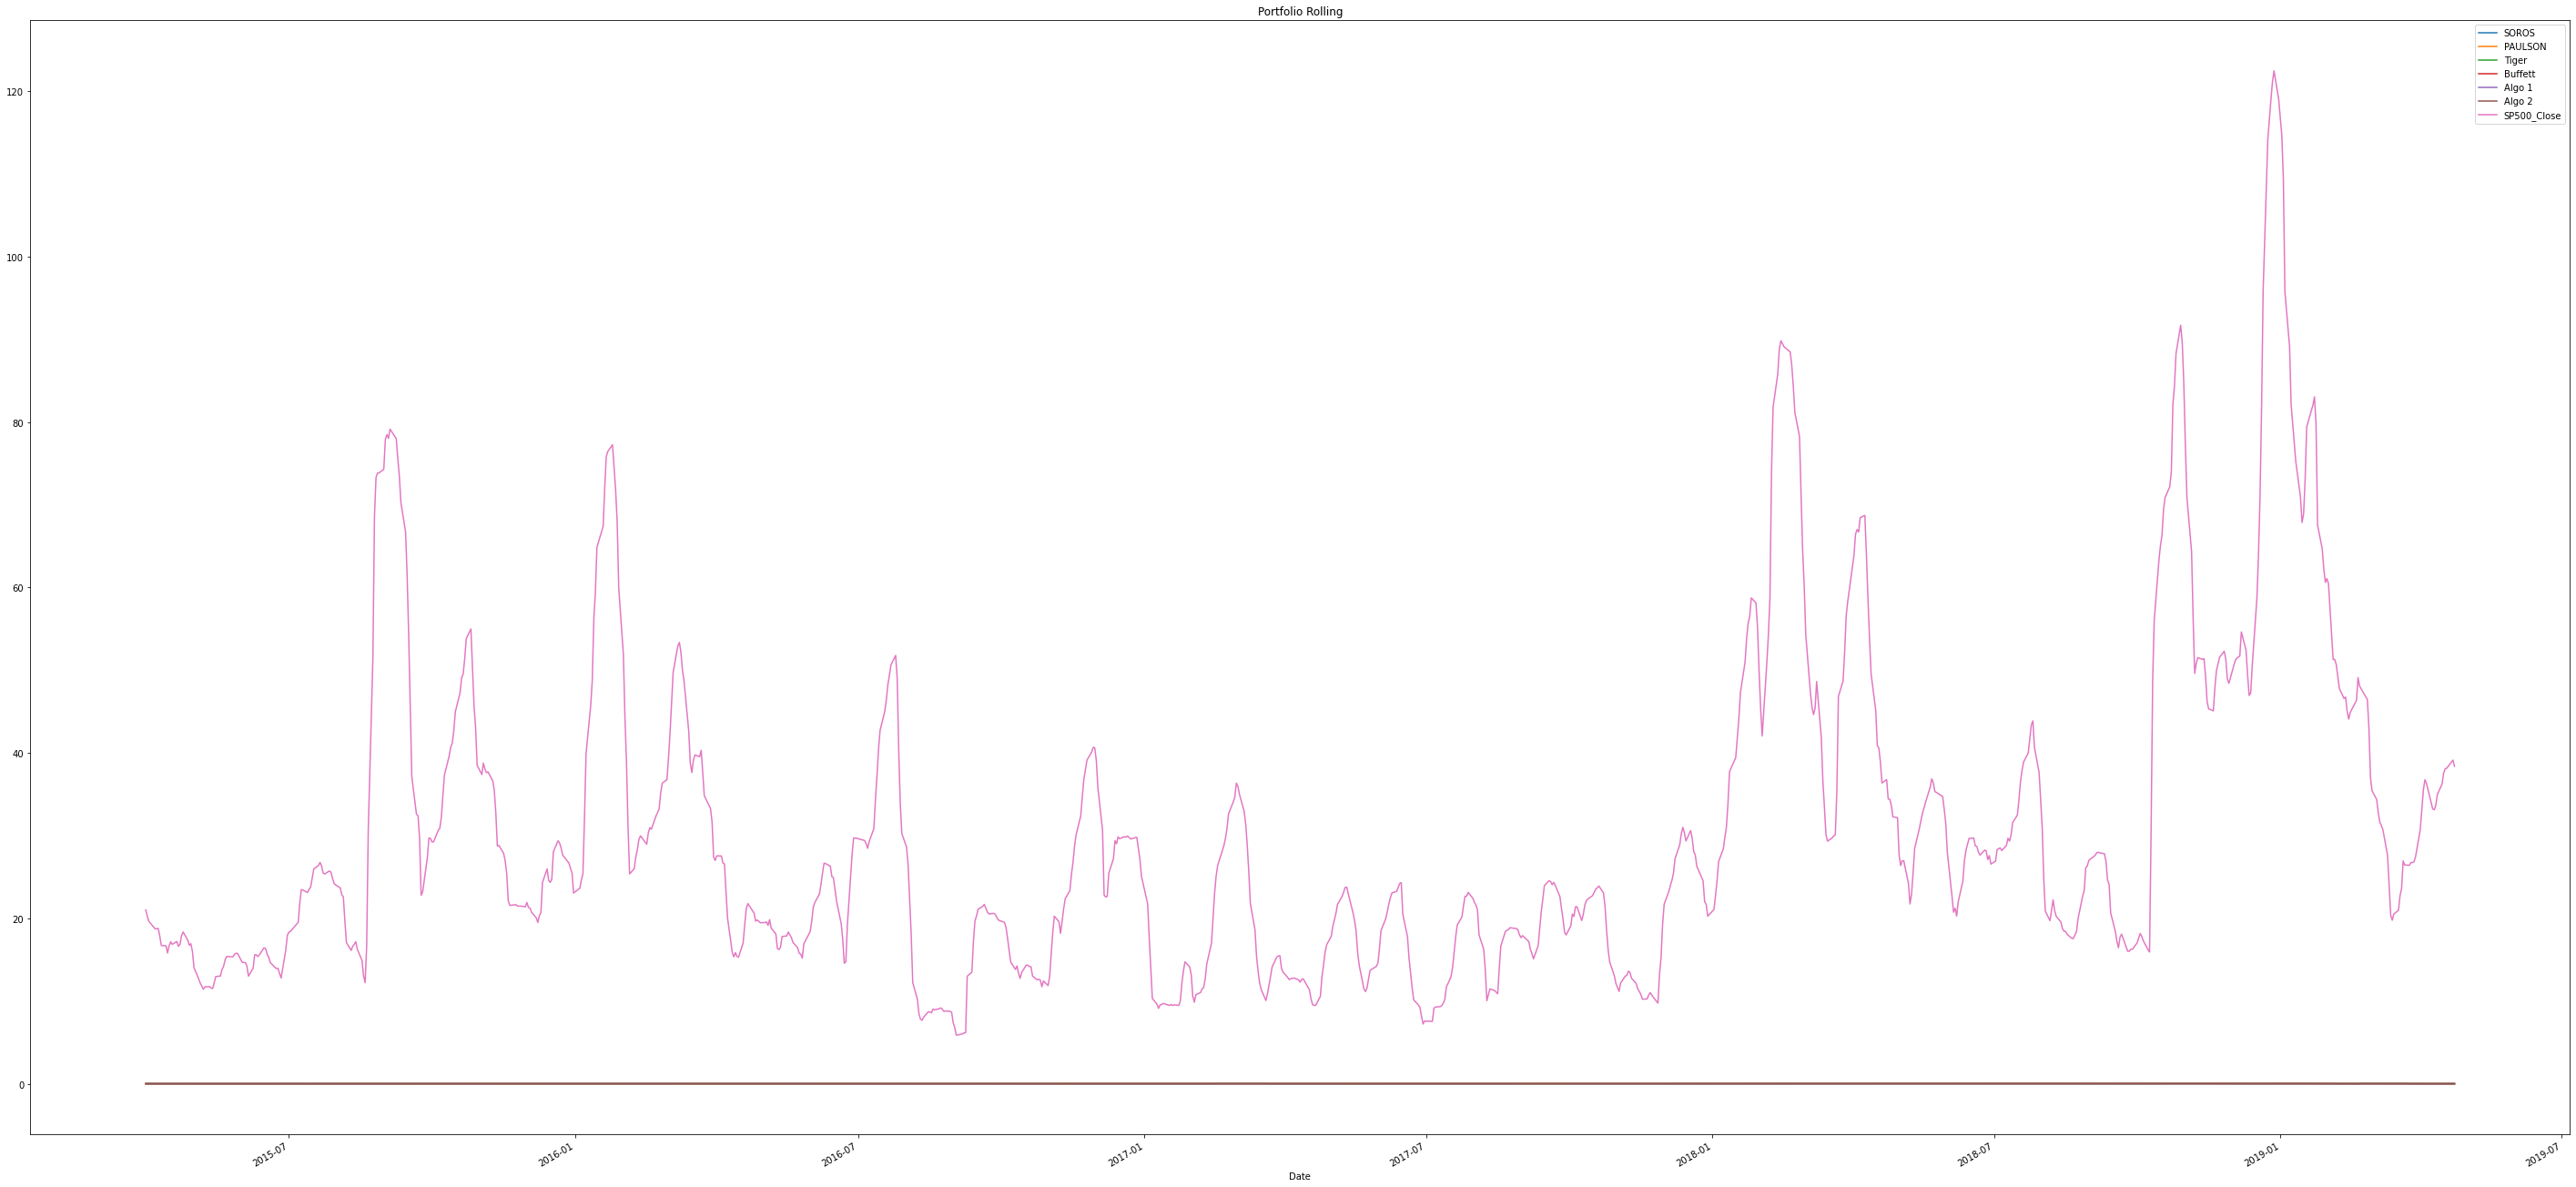

In [29]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
portfolio_rolling = portfolio_df.rolling(window = 21).std()
# Plot the rolling standard deviation
portfolio_rolling.plot(figsize = (50,25), title = 'Portfolio Rolling')

### Calculate and plot the correlation

In [31]:
# Calculate the correlation
portfolio_corr = portfolio_df.corr()

# Display de correlation matrix
portfolio_corr.style.background_gradient(cmap = 'summer')

,SOROS,PAULSON,Tiger,Buffett,Algo 1,Algo 2,SP500_Close
SOROS,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.033918
PAULSON,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.036711
Tiger,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,-0.047823
Buffett,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.041547
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,-0.012608
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.036267
SP500_Close,0.033918,0.036711,-0.047823,0.041547,-0.012608,0.036267,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [32]:
# Calculate covariance of a single portfolio
covar = portfolio_df['Algo 1'].rolling(window = 60).cov(portfolio_df['S&P 500'])

var = portfolio_df['S&P 500'].rolling(60).var()

beta = covar / var

beta.plot(figsize = (50,25), title = 'Algo 1 Beta')


KeyError: 'S&P 500'

In [33]:
# Calculate variance of S&P 500
var

NameError: name 'var' is not defined

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

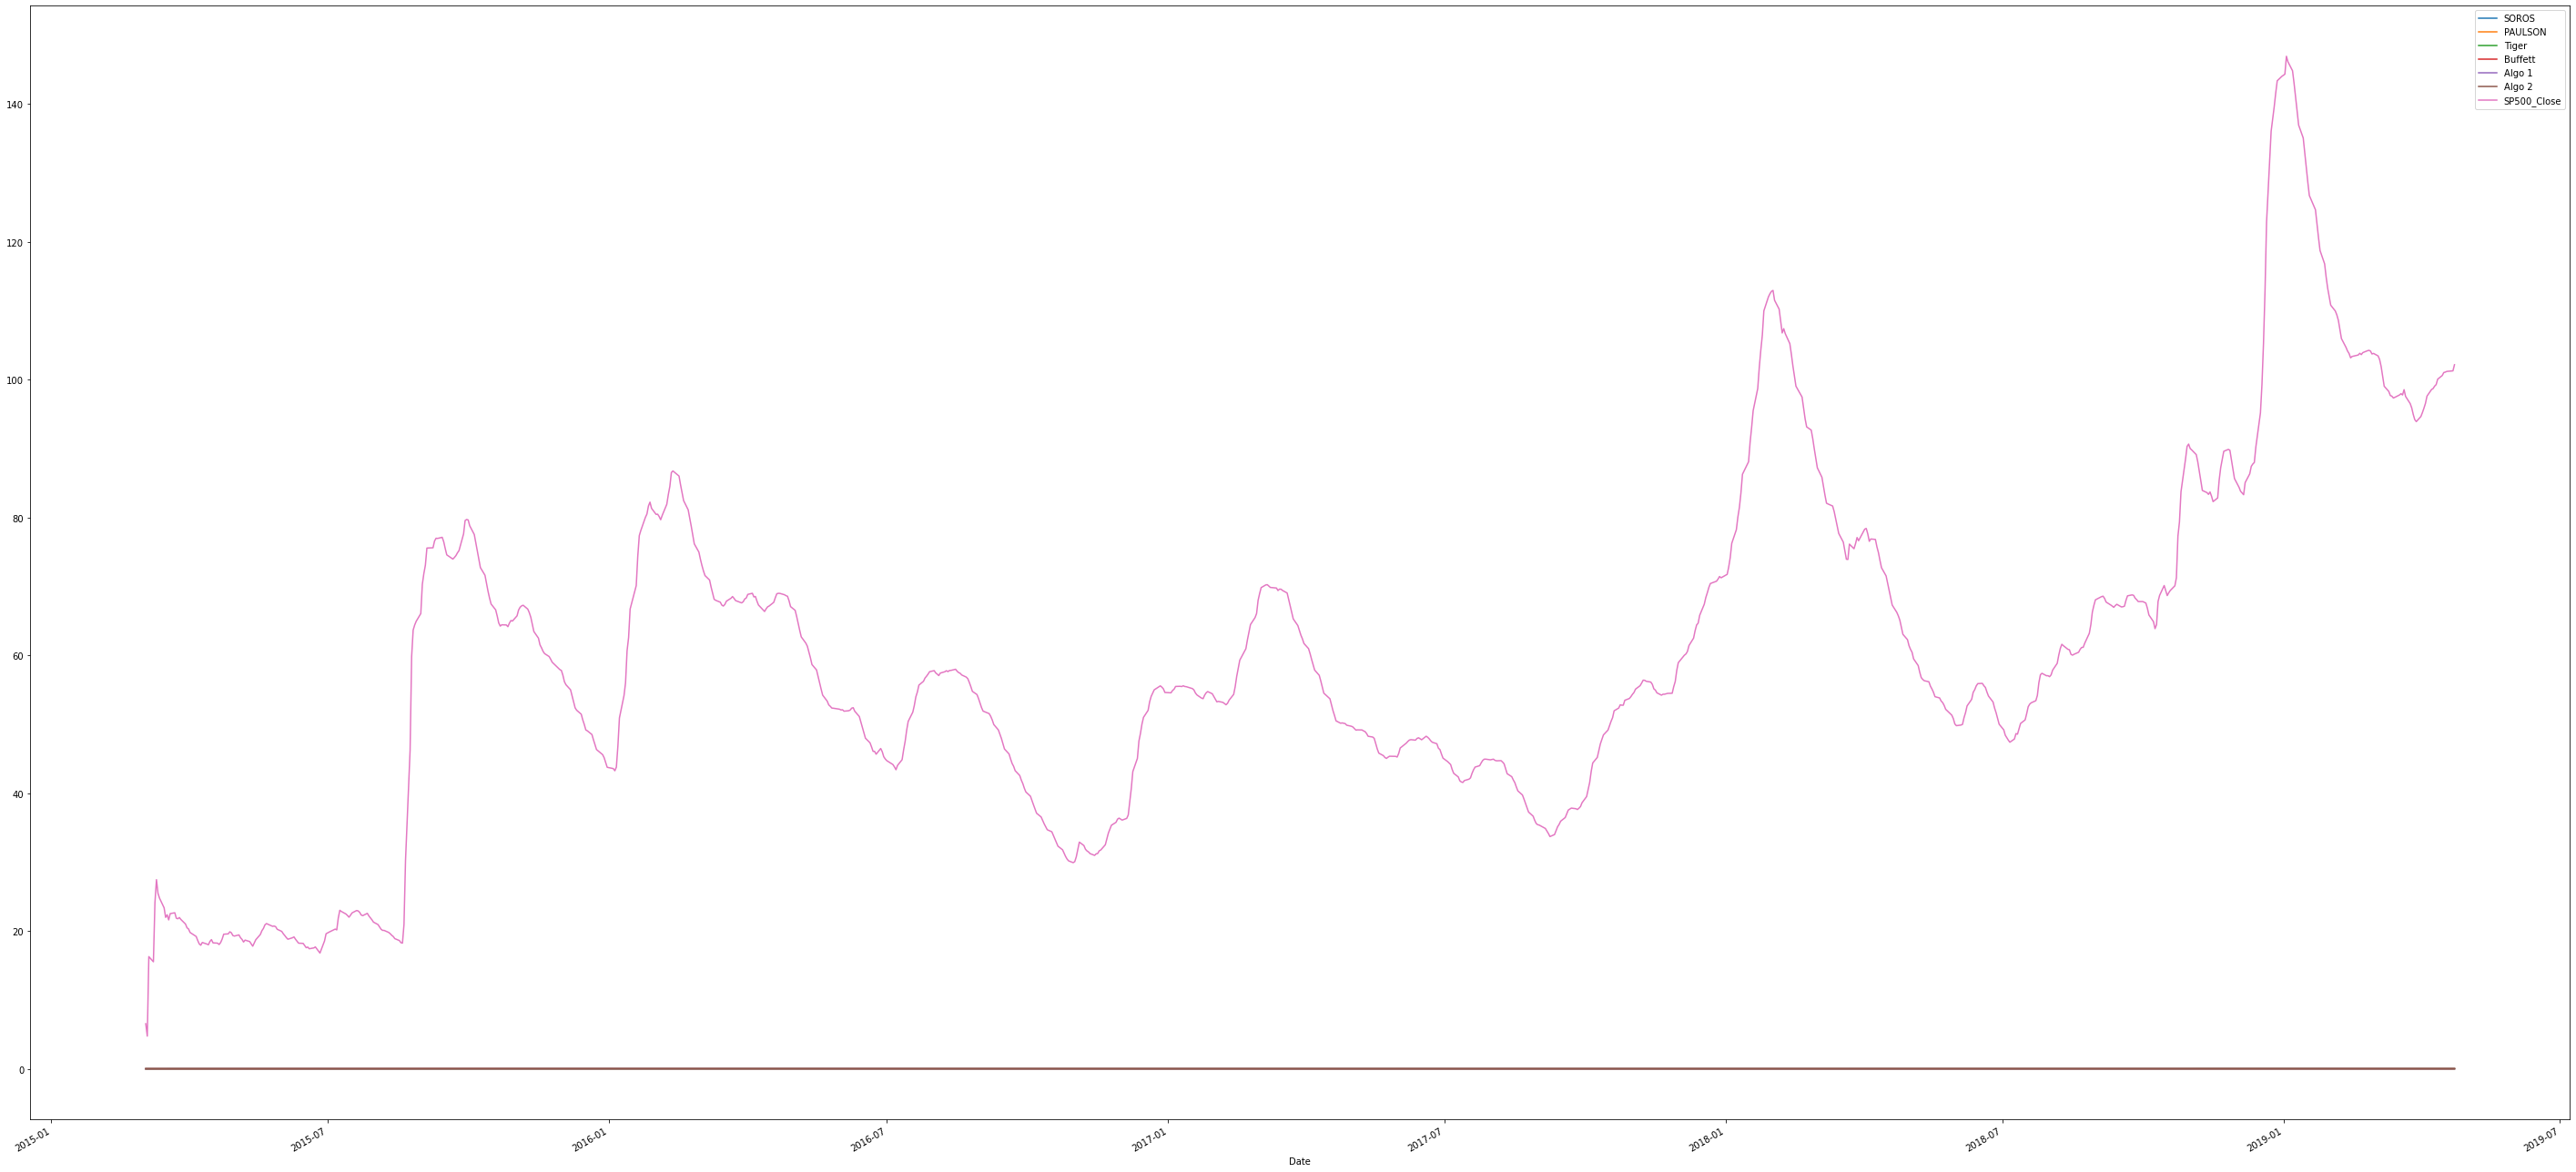

In [34]:
# Use `ewm` to calculate the rolling window
portfolio_df.ewm(halflife = 21).std().plot(figsize = (50,25))


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [35]:
# Annualized Sharpe Ratios
sharpe_ratios = (portfolio_df.mean() * 252 / (portfolio_df.std() * np.sqrt(252)))
sharpe_ratios.head()

SOROS      0.356417
PAULSON   -0.483570
Tiger     -0.121060
Buffett    0.621810
Algo 1     1.378648
dtype: float64

<AxesSubplot:>

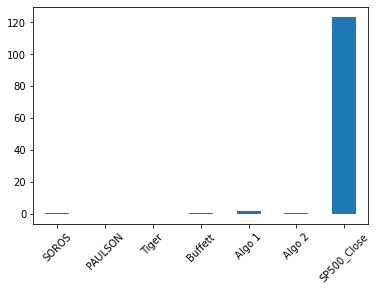

In [36]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(rot = 45)

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [62]:
# Reading data from 1st stock
goog = Path('Resources/goog_historical.csv')
goog_df  = pd.read_csv(goog,
                      index_col = "Trade DATE",
                      infer_datetime_format = True,
                      parse_dates= True
)
goog_df = goog_df.sort_index()
goog_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [63]:
# Reading data from 2nd stock
aapl = Path('Resources/aapl_historical.csv')
aapl_df  = pd.read_csv(aapl,
                      index_col = "Trade DATE",
                      infer_datetime_format = True,
                      parse_dates= True
)
aapl_df = aapl_df.sort_index()
aapl_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [64]:
# Reading data from 3rd stock
cost = Path('Resources/cost_historical.csv')
cost_df  = pd.read_csv(cost,
                      index_col = "Trade DATE",
                      infer_datetime_format = True,
                      parse_dates= True
)
cost_df = cost_df.sort_index()
cost_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


In [79]:
# Combine all stocks in a single DataFrame
all_portfolio = pd.concat([goog_df, aapl_df, cost_df], axis = 'rows', join = 'inner')
all_portfolio.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [80]:
# Reset Date index
all_portfolio = all_portfolio.reset_index()
all_portfolio.head()

,Trade DATE,Symbol,NOCP
0,2018-05-11,GOOG,1098.26
1,2018-05-14,GOOG,1100.20
2,2018-05-15,GOOG,1079.23
3,2018-05-16,GOOG,1081.77
4,2018-05-17,GOOG,1078.59


In [81]:
# Reorganize portfolio data by having a column per symbol
portfolio_clean = all_portfolio.pivot_table(values = 'NOCP', index = 'Trade DATE', columns = 'Symbol')
portfolio_clean.head()


Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [82]:
# Calculate daily returns
daily_portfolio = portfolio_clean.pct_change()
# Drop NAs
daily_portfolio.dropna().copy
# Display sample data
daily_portfolio.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,NaN,NaN,NaN
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [85]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_return = daily_portfolio.dot(weights)
# Display sample data
portfolio_return.head()

Trade DATE
2018-05-11         NaN
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [88]:
# Join your returns DataFrame to the original returns DataFrame
portfolio_df['Custom'] = portfolio_return
portfolio_df.tail()

,SOROS,PAULSON,Tiger,Buffett,Algo 1,Algo 2,SP500_Close,Custom
Date,,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,2907.06,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,2900.45,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,2905.03,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,2907.97,0.001217
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,2933.68,0.011959


In [90]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
portfolio_df.dropna().copy()
portfolio_df.head()

,SOROS,PAULSON,Tiger,Buffett,Algo 1,Algo 2,SP500_Close,Custom
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,2107.78,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,2098.53,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,2101.04,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,2071.26,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,2079.43,NaN


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [91]:
# Calculate the annualized `std`
portfolio_std = portfolio_df.std() * np.sqrt(252)
portfolio_std

SOROS             0.125335
PAULSON           0.111488
Tiger             0.172936
Buffett           0.205077
Algo 1            0.120967
Algo 2            0.132430
SP500_Close    4855.251803
Custom            0.211496
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling 21 Standard Deviation'}, xlabel='Date'>

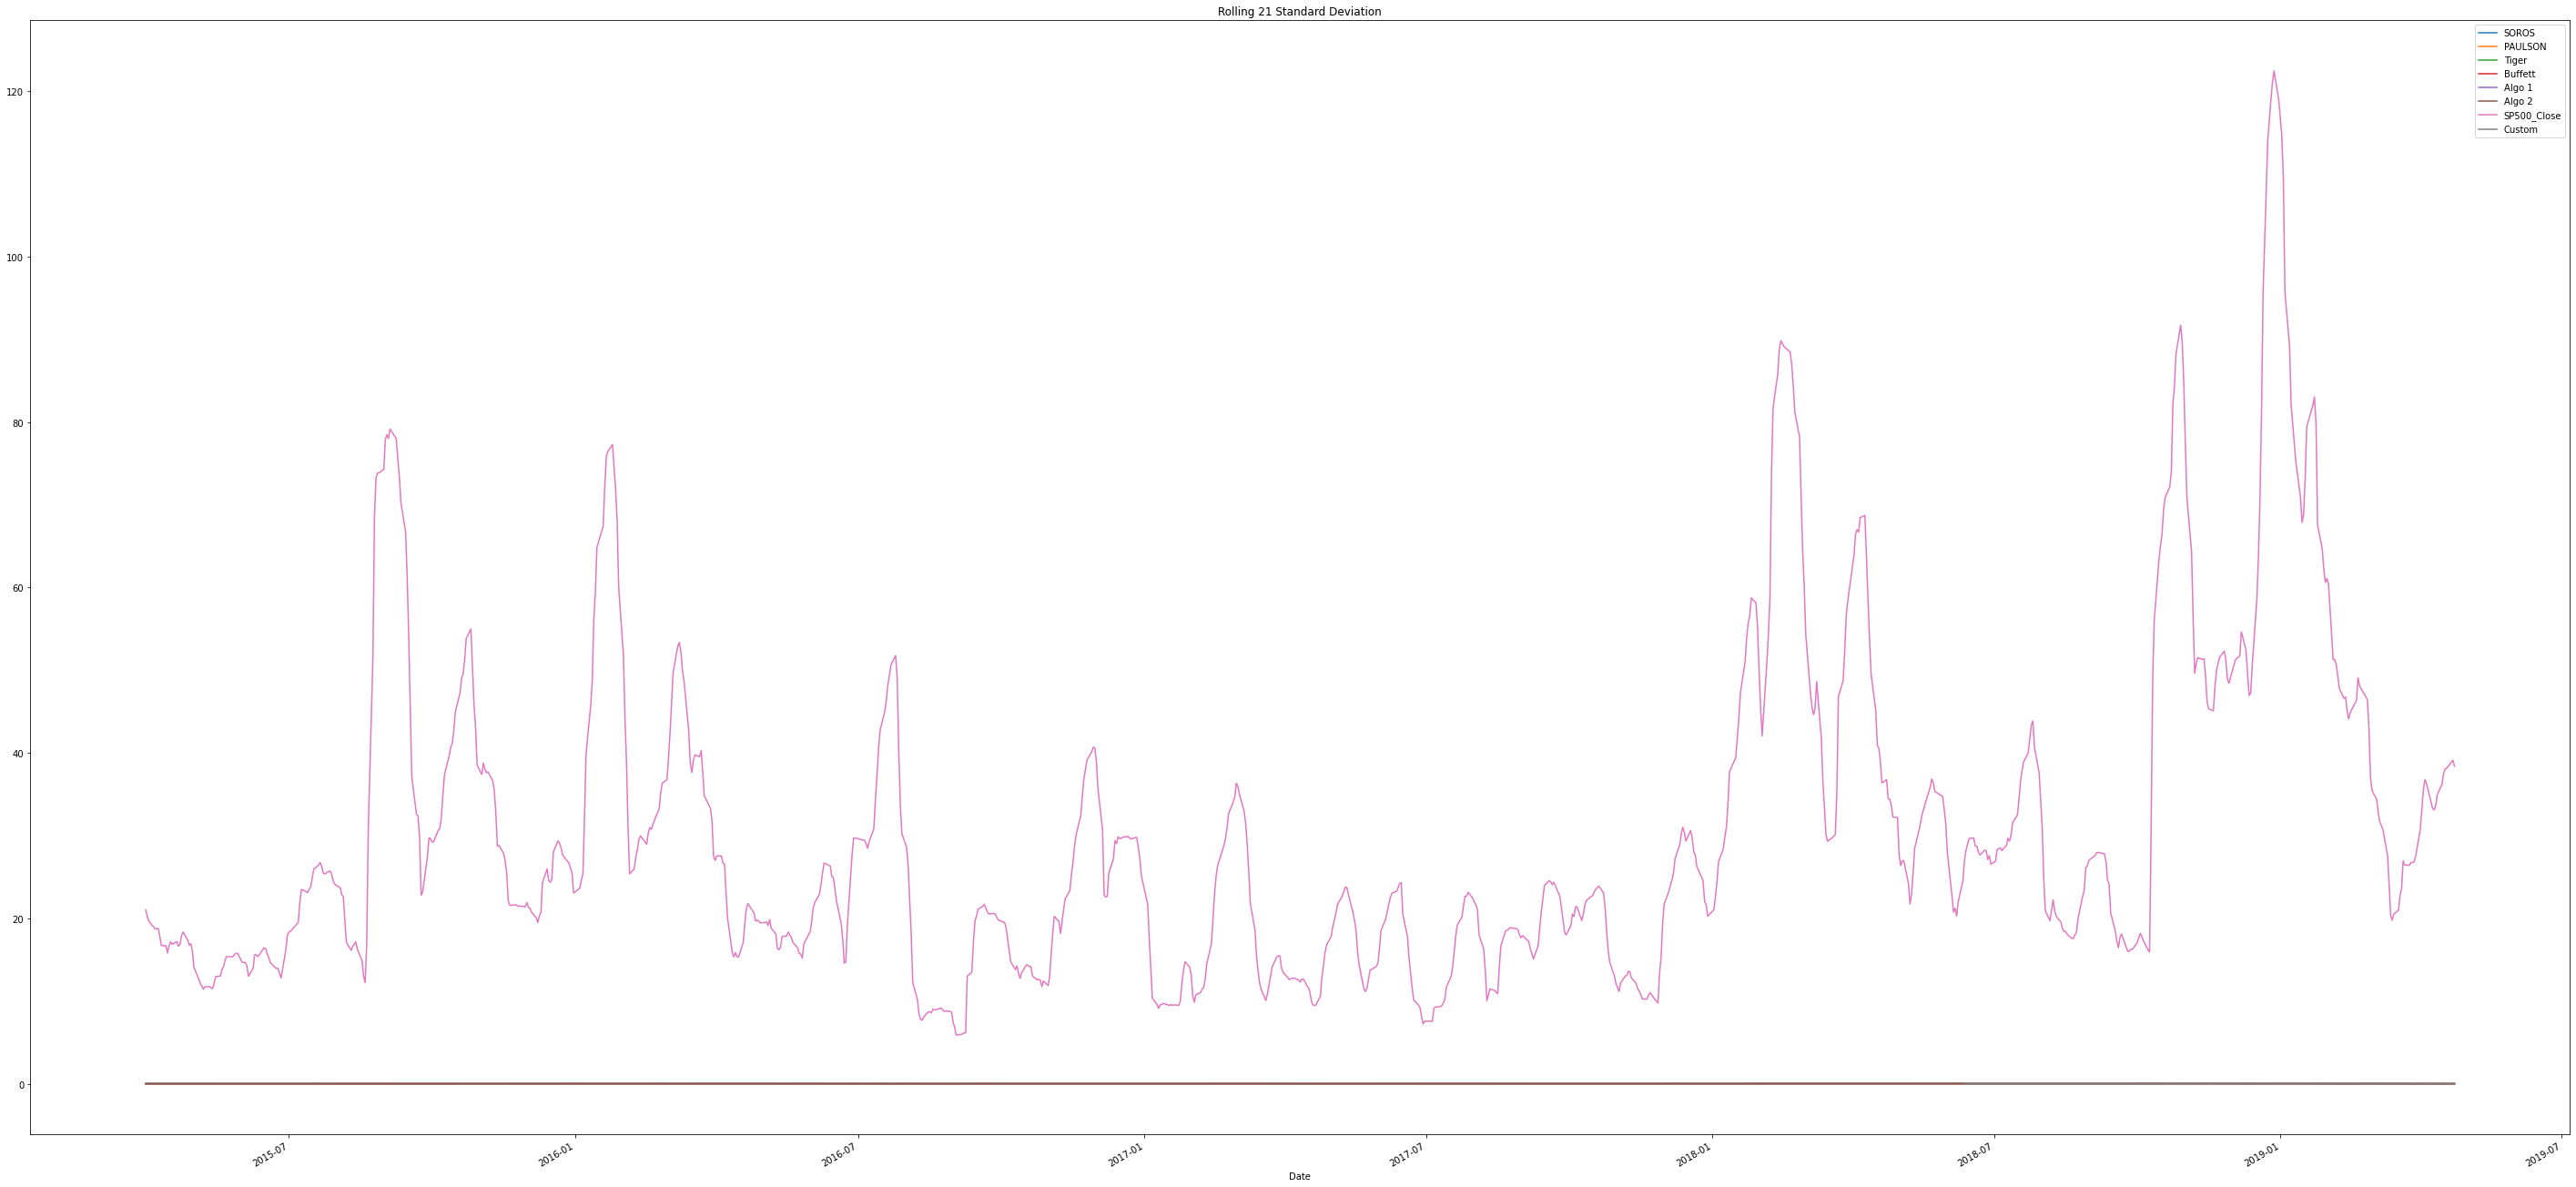

In [97]:
# Calculate rolling standard deviation
portfolio_rolling = portfolio_df.rolling(window = 21).std()
# Plot rolling standard deviation
portfolio_rolling.plot(figsize = (50,25), title = 'Rolling 21 Standard Deviation')

### Calculate and plot the correlation

<AxesSubplot:>

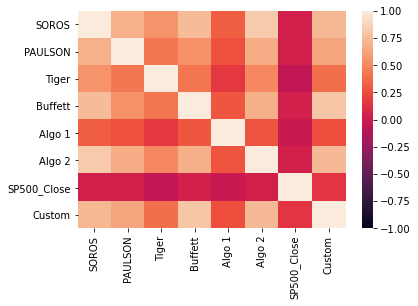

In [99]:
# Calculate and plot the correlation
portfolio_corr = portfolio_df.corr()
sns.heatmap(portfolio_corr, vmin = -1, vmax = 1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:xlabel='Date'>

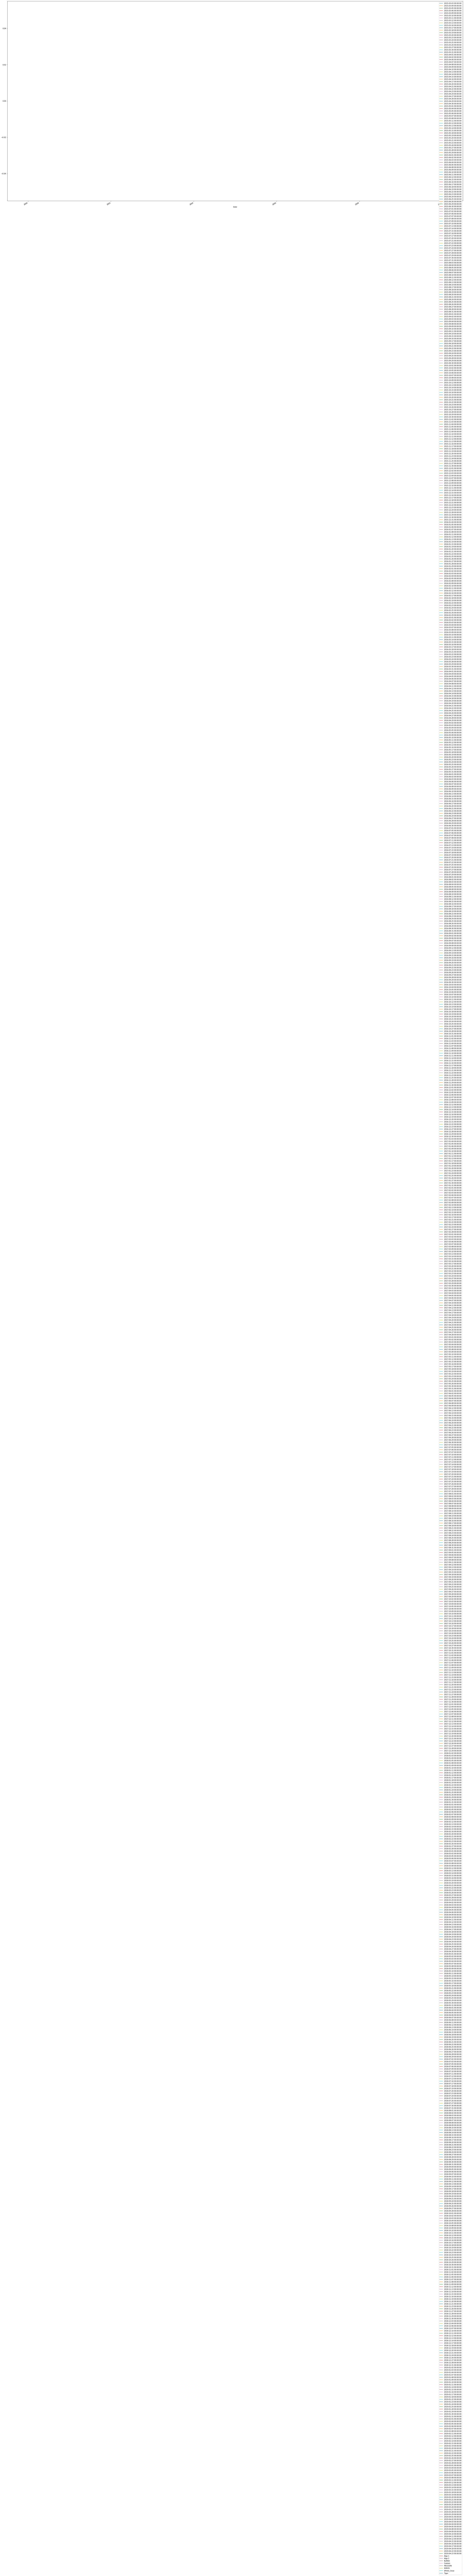

In [102]:
# Calculate and plot Beta
portfolio_covar = portfolio_df.rolling(window = 60).cov(portfolio_df['SP500_Close'])
portfolio_var = portfolio_df['SP500_Close'].rolling(window = 60).var()
portfolio_beta = (portfolio_covar / portfolio_var)
portfolio_beta.plot(figsize = (50, 25))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [106]:
# Calculate Annualzied Sharpe Ratios
sharpe_portfolio = (portfolio_df.mean() * 252 / (portfolio_df.std() * np.sqrt(252)))
sharpe_portfolio

SOROS            0.356417
PAULSON         -0.483570
Tiger           -0.121060
Buffett          0.621810
Algo 1           1.378648
Algo 2           0.501364
SP500_Close    123.476112
Custom           0.933123
dtype: float64

In [107]:
# Visualize the sharpe ratios as a bar plot
sharpe_portfolio.plot.bar

<bound method PlotAccessor.bar of <pandas.plotting._core.PlotAccessor object at 0x00000226A7549908>>

### How does your portfolio do?

Write your answer here!

In [ ]:
Unsure